# Fluence calculator

In [2]:
import numpy as np

AveragedPower=15E-6#power in W
RepRate=40E6# repetition rate in Hz
BeamSize=3.2E-3# Beam radius size in mm
PulseWidth=100E-15 # pulse width in s

Period=1/RepRate
E_pulse=AveragedPower*Period
Pusle_PeakPower=E_pulse/PulseWidth
Irradiance=AveragedPower/((np.pi*(BeamSize*1E-1)**2))
Fluence_mm=E_pulse/((np.pi*BeamSize**2))
Fluence_um=E_pulse/((np.pi*(BeamSize*1E3)**2))
Fluence_cm=E_pulse/((np.pi*(BeamSize*1E-1)**2))

print(' Peak power ={}W \n Energy per pulse = {} J\n \nIrradiance= {} W/cm2\n\n Fluence={} J/cm2 \n Fluence={} J/mm2 \n Fluence={} J/um2 '.format(
    Pusle_PeakPower,E_pulse,Irradiance,Fluence_cm,Fluence_mm,Fluence_um))

DamageThreshold= 0.1 # Damage Thresshold in J/cm
InitialPulseWidth=10E-9

print('\n Damage threshold objectives {} J/cm for a beam of {} mm in diameter'.format(DamageThreshold*np.sqrt(PulseWidth/InitialPulseWidth),BeamSize))

 Peak power =3.75W 
 Energy per pulse = 3.75e-13 J
 
Irradiance= 46.62742473395371 W/cm2

 Fluence=1.1656856183488427e-06 J/cm2 
 Fluence=1.165685618348843e-08 J/mm2 
 Fluence=1.1656856183488429e-14 J/um2 

 Damage threshold objectives 0.00031622776601683794 J/cm for a beam of 0.0032 mm in diameter


In [15]:
wave=550E-9
NA=0.42
M=50
e=700E-9
dtot=wave/NA**2+e/(M*NA)
print('Dof={}m'.format(dtot))

Dof=3.15124716553288e-06m


# ML Tools computation

In [16]:
PowerMeasured=10 # Power in uw
ND=0
Bs=0.5
ObjTrans=0.6
print('Power send  to the sample: {} uW'.format((PowerMeasured*(10**(-ND))*Bs*ObjTrans)))

Power send  to the sample: 3.0 uW


# Compute density of carrier generated

In [35]:
Wavelength=405E-9
FilmThickness=560E-9
Lifetime=100E-9
Abs=0.72
R=0.113

AveragedPower=500E-6#power in W
RepRate=40E6# repetition rate in Hz
BeamSize=1.7E-3# Beam radius size in mm
PulseWidth=100E-15 # pulse width in s

Period=1/RepRate
E_pulse=AveragedPower*Period

Fluence_cm=E_pulse/((np.pi*(BeamSize*1E-1)**2))

h=6.626*1E-34
c=2.998*1E8
E_photon=h*c/Wavelength

Fluence_cm_Photons=Fluence_cm/E_photon

N0=Fluence_cm_Photons/(FilmThickness*1E2)*(1-R)*(1-1/np.exp(1))/Abs# Convertion in cm3
N0=Fluence_cm_Photons/(FilmThickness*1E2)*Abs*Lifetime# Convertion in cm3

print('Photon energy= {:.2e}'.format(E_photon))
print('Number of photons in the beam = {:.2e}'.format(E_pulse/E_photon))
print('Fluence #NbPhotons/cm^2={:.2e}'.format(Fluence_cm_Photons))
print('N_0 photogenerated carier density cm3^-1 = {:.2e}'.format(N0))

Photon energy= 4.90e-19
Number of photons in the beam = 2.55e+07
Fluence #NbPhotons/cm^2=2.81e+14
N_0 photogenerated carier density cm3^-1 = 3.61e+11


In [34]:
Pusle_PeakPower=237.5# in W

PowerToReachPeak=(Pusle_PeakPower*PulseWidth*RepRate)
print('To reach {} at {} MHz the avg power need to be {} mW'.format(Pusle_PeakPower,RepRate/1E6,PowerToReachPeak*1E3))

To reach 237.5 at 40.0 MHz the avg power need to be 0.9500000000000001 mW


# Compute 1 sun equivalent

Power send  to the sample: 3.85e-09 uW
7.885017680069186e-09
3.85e-09


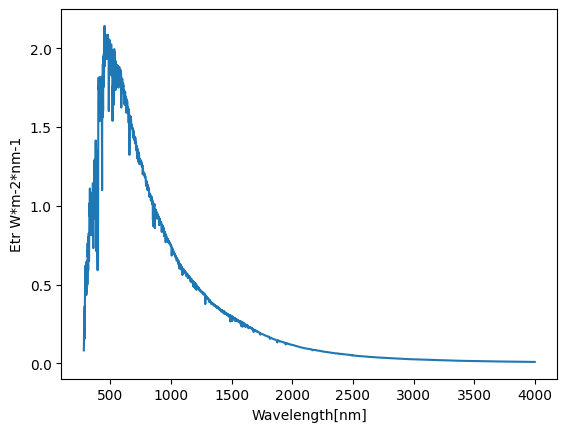

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
PowerMeasured=11E-6 # Power in uw
ND=3
Bs=0.5
ObjTrans=0.7
BeamSize=1.7E-6

AvgPower=(PowerMeasured*(10**(-ND))*Bs*ObjTrans)
Irradiance=AveragedPower/((np.pi*(BeamSize)**2))

AMGS=pd.read_excel('./astmg173.xls',header=1)
fig,ax=plt.subplots(1,1)
Spectrum=pd.Series(data=AMGS.iloc[:,1].to_numpy(),index=AMGS.iloc[:,0])
BandgapWave=550
ax.plot(Spectrum)
ax.set_xlabel('Wavelength[nm]')
ax.set_ylabel(AMGS.columns[1])
print('Power send  to the sample: {} uW'.format(AvgPower))

IrradianceSun=((np.pi*(BeamSize)**2))*np.trapezoid(Spectrum.loc[Spectrum.index>BandgapWave])
print(IrradianceSun)
print(AvgPower)

# White light calculator 

In [20]:
# Critical power for WLG
alpha=1
lambdac=0.8E-6 #wavelength in m
BeamSize=2E-6# Beam radius size in m

n0=1.7552
n2=3.3E-16
P_crit=alpha*lambdac**2/(2*np.pi*n0*n2)
zr=np.pi*n0*BeamSize**2/lambdac
z_sf=0.367*zr/np.sqrt(((np.sqrt(Pusle_PeakPower/P_crit)-0.852))**2-0.0219)

Rayleigth=np.pi*n0*BeamSize**2/lambdac

print('P_crit= {}[W]'.format(P_crit))
print('P_peak/P_c={}'.format(Pusle_PeakPower/P_crit))
print('Self-focusing distance s_f= {}m'.format(z_sf))
print('Rayleight length z_r= {}m'.format(Rayleigth))

P_crit= 175.8569576441483[W]
P_peak/P_c=1.350529448374674
Self-focusing distance s_f= 3.712682578087935e-05m
Rayleight length z_r= 2.7570617127904025e-05m


# Adjust LIDT

In [21]:
#Adjusted LIDT
LIDT=0.2
PulseWith_L=10E-9
Wavelength_L=1064
Wavelength=800
AdjustedLIdt=LIDT*np.sqrt(PulseWidth/PulseWith_L)*np.sqrt(Wavelength/Wavelength_L)
print('Adjusted LIDT : {} J/cm2'.format(AdjustedLIdt))
print('Current fluence: {} J/cm2'.format(Fluence_cm))


Adjusted LIDT : 0.0005484084971070817 J/cm2
Current fluence: 2.9919264204286963e-07 J/cm2


# Focused Beam size 

In [22]:
BeamSize=25E-3# Beam radius size in m at the lens
f=400E-3 # focal distance of the lens in m
lambdac=700E-9 # wavelength in m
M=2 # Beam quality factor
NA=np.arctan(BeamSize/f)

wo=4*M*lambdac*f/(np.pi*BeamSize)/2


print('Beam diameter at the focus spot:\n\t d={}mm\n\t d={}um'.format(2*wo*1E3,2*wo*1E6))
print('DOF:\n\t d={}mm\n\t d={}um'.format(2*np.pi*(wo*1E3)**2/(M*(lambdac*1E3)),2*np.pi*(wo*1E6)**2/(M*(lambdac*1E6))))
print('NA={}'.format(str(np.arctan(BeamSize/f))))

Beam diameter at the focus spot:
	 d=0.028520565802067646mm
	 d=28.520565802067647um
DOF:
	 d=0.9126581056661647mm
	 d=912.6581056661649um
NA=0.06241880999595735


# Compute Irradiance

In [23]:
AveragedPower=0.125E-3# Power in Watt
BeamSize=3E-6# Beam radius size in m at the lens
I=AveragedPower/((np.pi*(BeamSize*1E-1)**2))
print('Irradiance ={} W/cm2'.format(I))

Irradiance =442097064.14415365 W/cm2


# Wavelength Calibration Pixis

In [24]:
#Compute wavelength
a=2.354381287460651
b=490.05901104995587
PixelNumber=np.linspace(1,1024,1024)
CenterPixel=700
Wavelength=(PixelNumber-b)/a+CenterPixel

# Misc

In [25]:
folder=['c:/Document/Mes1002x=40/','c:/Document/Mes1001x=40/','c:/Document/Mes3x=40/','c:/Document/Mes1x=40/']
for t in folder:
    print(t[t.find('Mes')+3:t.find('x')])
print(sorted(folder, key=lambda x: float(x[x.find('Mes')+3:x.find('x')])))

1002
1001
3
1
['c:/Document/Mes1x=40/', 'c:/Document/Mes3x=40/', 'c:/Document/Mes1001x=40/', 'c:/Document/Mes1002x=40/']


In [26]:
x=[0,0,1]
y=[0,1,0]

Pos=np.transpose(np.array([x,y]))
print(Pos)


[[0 0]
 [0 1]
 [1 0]]
